### Zachary Brooks  
    | Seller      
    | Invests in historical houses, best neighborhoods, high profits, best timing within a year, should renovate?                                                  

In [960]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt
import plotly.graph_objects as go


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [961]:
df_housing = pd.read_csv('./King_County_House_prices_dataset.csv')
df_housing.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [962]:
df_housing.sort_values('price')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15279,40000362,5/6/2014,78000.000,2,1.000,780,16344,1.000,0.000,0.000,...,5,780,0.0,1942,NaN,98168,47.474,-122.280,1700,10387
465,8658300340,5/23/2014,80000.000,1,0.750,430,5050,1.000,NaN,0.000,...,4,430,0.0,1912,0.000,98014,47.650,-121.909,1200,7500
16184,3028200080,3/24/2015,81000.000,2,1.000,730,9975,1.000,NaN,0.000,...,5,730,0.0,1943,0.000,98168,47.481,-122.315,860,9000
8267,3883800011,11/5/2014,82000.000,3,1.000,860,10426,1.000,0.000,0.000,...,6,860,0.0,1954,0.000,98146,47.499,-122.341,1140,11250
2139,1623049041,5/8/2014,82500.000,2,1.000,520,22334,1.000,0.000,0.000,...,5,520,0.0,1951,0.000,98168,47.480,-122.296,1572,10570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,8907500070,4/13/2015,5350000.000,5,5.000,8000,23985,2.000,0.000,4.000,...,12,6720,1280.0,2009,0.000,98004,47.623,-122.220,4600,21750
4407,2470100110,8/4/2014,5570000.000,5,5.750,9200,35069,2.000,0.000,0.000,...,13,6200,3000.0,2001,NaN,98039,47.629,-122.233,3560,24345
9245,9208900037,9/19/2014,6890000.000,6,7.750,9890,31374,2.000,0.000,4.000,...,13,8860,1030.0,2001,0.000,98039,47.630,-122.240,4540,42730
3910,9808700762,6/11/2014,7060000.000,5,4.500,10040,37325,2.000,1.000,2.000,...,11,7680,2360.0,1940,2001.000,98004,47.650,-122.214,3930,25449


In [963]:
df_housing.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.230,27274.442
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


In [1187]:
df_housing.query('waterfront==1 & view==4').price.describe()

count       123.000
mean    1735380.894
std     1035619.519
min      285000.000
25%      909475.000
50%     1600000.000
75%     2300000.000
max     5110000.000
Name: price, dtype: float64

In [1188]:
df_housing.query('waterfront==1 & view==4').yr_built.describe()

count    123.000
mean    1964.276
std       26.893
min     1905.000
25%     1943.000
50%     1961.000
75%     1989.000
max     2014.000
Name: yr_built, dtype: float64

In [1232]:
df_housing[['sqft_living15', 'price']].describe()

,sqft_living15,price
count,21597.000,21597.000
mean,1986.620,540296.574
std,685.230,367368.140
min,399.000,78000.000
25%,1490.000,322000.000
50%,1840.000,450000.000
75%,2360.000,645000.000
max,6210.000,7700000.000


In [1210]:
prices_tojoin= df_housing.groupby('zipcode').price.mean()
prices_tojoin

zipcode
98001    281194.870
98002    234284.035
98003    294111.279
98004   1356523.991
98005    810289.696
            ...    
98177    676419.392
98178    310612.756
98188    289078.346
98198    302896.739
98199    792187.874
Name: price, Length: 70, dtype: float64

In [ ]:
pricet

In [964]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Data Cleaning
1. Datatypes in Columns
    - ~~'date'  - object to date.time~~
    - ~~'bathrooms' - round to 2 places~~
    - ~~'price' - round to 2 places~~
    - ~~'floors' - round to 2 places~~
    - 'waterfront'- which unique values are present(O or 1?), change to integer(?) `array([nan,  0.,  1.]), 2376 data missing`

    - 'view' - which unique values present(1-4?), change to integer(?) `array([ 0., nan,  3.,  4.,  2.,  1.]),63 Missing`

    - 'condition' - which unique values (1-5?), change to integer (?) `array([3, 5, 4, 1, 2]), None missing`

    - 'grade' - which unique values (3-13?), change to integer (?) `array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13]), None missing`

    - 'sqft_basement' - ~~change to int or float with 1 decimal pl like sqftabove?~~
    
    - 'year_renovated' - see if any years are missing, change to int64 
        `array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.]), 3842 Missing values`
    - yr_built and yr_renovated to pd.datetime
2. Missing Data  (21597 entries in total)
- 8   waterfront     19221 non-null  float64 ` 2376  `
- 9   view           21534 non-null  float64 `63 `
- 15  yr_renovated   17755 non-null  float64 `3842 `

3. Check for Duplicate Rows and Drop

4. Create New Columns
- 'price per sqft' = price/('sqft_living space' + 'sqft_lot') round 2 places
- 'age in years' of each house (necessary?)


In [965]:
# Change column 'date'  - object to date.time
#df_housing['date'] = pd.to_datetime(df_housing['date'], format='%Y/%m/%d')
#attempt to change directly didn't work
df_housing['date'].dtypes  

dtype('O')

In [966]:
#Change column 'date'  - object to string, let's see if that works now
#df_weather = df_weather.astype({'precipitation': float})
df_housing = df_housing.astype({'date': str})


In [967]:
df_housing['date'] = pd.to_datetime(df_housing['date'], format='%m/%d/%Y')

In [968]:
df_housing['date'].dtypes 

dtype('<M8[ns]')

In [969]:
# Convert 'dates' column to datetime format
df_housing['date'] = pd.to_datetime(df_housing['date'])

print(df_housing.dtypes) 

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement            object
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object


In [970]:
#df_housing['yr_built'] = pd.to_datetime(df_housing['yr_built'], errors='coerce')
#print(df_housing.dtypes) 

In [971]:
#df_housing['yr_renovated'] = pd.to_datetime(df_housing['yr_renovated'], errors='coerce')
#print(df_housing.dtypes) 

In [972]:
#ForgetRounding the columns ('bathrooms', 'price','floors' to 2 places
#df_housing['bathrooms'] = df_housing.bathrooms.round(2)
#df_housing['price'] = df_housing.price.round(2)
#df_housing['floors'] = df_housing.floors.round(2)


In [973]:
df_housing['bathrooms'].dtypes 

dtype('float64')

In [974]:
df_housing['waterfront'].unique()

array([nan,  0.,  1.])

In [975]:
#waterfront types
df_housing['waterfront'].value_counts()

waterfront
0.000    19075
1.000      146
Name: count, dtype: int64

In [976]:
#DATA Missing from waterfront
df_housing['waterfront'].isna().sum()

2376

In [977]:
df_housing['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [978]:
df_housing['view'].isna().sum()

63

In [979]:
df_housing['condition'].unique()

array([3, 5, 4, 1, 2])

In [980]:
df_housing['condition'].isna().sum()

0

In [981]:
df_housing['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [982]:
df_housing['grade'].isna().sum()

0

In [983]:
df_housing['yr_renovated'].isna().sum()

3842

In [984]:
# CHECKING FOR DUPLICATES with missing data columns filled in 
df_housing[['id', 'waterfront', 'view', 'yr_renovated']].duplicated( ).value_counts( )


False    21503
True        94
Name: count, dtype: int64

In [985]:
df_housing['id'].duplicated( ).value_counts()

id
False    21420
True       177
Name: count, dtype: int64

In [986]:
#df_housing[df_housing.isna().any(axis=1)] #this ouputs any rows with NaN
df_housing[df_housing.isna().any(axis=1)].duplicated( ).value_counts( )

False    5835
Name: count, dtype: int64

In [987]:
df_housing.duplicated( ).value_counts()

False    21597
Name: count, dtype: int64

#### ~~HOW DUPLICATES ARE BEING HANDLED~~
~~Ok so I am going to drop the 94 rows that have duplicates based on **id, plus waterfront, view and yr renovated** columns. My reasoning- since these additional columns had missing values if they are duplicates, there would be no loss in information to the data.  How can I compress the data in the rows where only the ID is duplicated- to fill in that missing info?~~

In [988]:
#drop 94 duplicates and reset index
# df_weather = df_weather.drop_duplicates( )
df_housing2 = df_housing[['id', 'waterfront', 'view', 'yr_renovated']].drop_duplicates( )



In [989]:
# df_weather.reset_index(inplace=True, drop=True)
#df_housing2.reset_index(inplace=True, drop=True)
df_housing2.head()

,id,waterfront,view,yr_renovated
0,7129300520,NaN,0.000,0.000
1,6414100192,0.000,0.000,1991.000
2,5631500400,0.000,0.000,NaN
3,2487200875,0.000,0.000,0.000
4,1954400510,0.000,0.000,0.000


In [990]:
df_housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [991]:
df_housing.sort_values('date')


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7316,2202500290,2014-05-02,435000.000,4,1.000,1450,8800,1.000,0.000,0.000,...,7,1450,0.0,1954,0.000,98006,47.575,-122.135,1260,8942
20586,7853361370,2014-05-02,555000.000,4,2.500,3310,6500,2.000,0.000,0.000,...,8,3310,0.0,2012,0.000,98065,47.515,-121.870,2380,5000
1040,7197300105,2014-05-02,550000.000,4,2.500,1940,10500,1.000,NaN,0.000,...,7,1140,800.0,1976,0.000,98052,47.683,-122.114,2200,10500
20543,3438501320,2014-05-02,295000.000,2,2.500,1630,1368,2.000,0.000,0.000,...,7,1280,350.0,2009,0.000,98106,47.549,-122.363,1590,2306
9587,472000620,2014-05-02,790000.000,3,2.500,2600,4750,1.000,0.000,0.000,...,9,1700,900.0,1951,0.000,98117,47.683,-122.400,2380,4750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19381,8149600265,2015-05-14,725000.000,4,1.750,1980,5850,1.000,NaN,1.000,...,8,1380,600.0,1960,0.000,98116,47.561,-122.391,1810,5850
12623,4166600610,2015-05-14,335000.000,3,2.000,1410,44866,1.000,0.000,0.000,...,7,1410,0.0,1985,0.000,98023,47.327,-122.370,2950,29152
5632,7923600250,2015-05-15,450000.000,5,2.000,1870,7344,1.500,0.000,0.000,...,7,1870,0.0,1960,0.000,98007,47.595,-122.144,1870,7650
13040,5101400871,2015-05-24,445500.000,2,1.750,1390,6670,1.000,0.000,0.000,...,6,720,670.0,1941,0.000,98115,47.691,-122.308,920,6380


In [992]:
df_housing['date'].describe()

count                            21597
mean     2014-10-29 04:20:38.171968512
min                2014-05-02 00:00:00
25%                2014-07-22 00:00:00
50%                2014-10-16 00:00:00
75%                2015-02-17 00:00:00
max                2015-05-27 00:00:00
Name: date, dtype: object

In [993]:
#FOR PLOT1
dates_homes_sale = df_housing['date'].sort_values().unique()
dates_homes_sale

<DatetimeArray>
['2014-05-02 00:00:00', '2014-05-03 00:00:00', '2014-05-04 00:00:00',
 '2014-05-05 00:00:00', '2014-05-06 00:00:00', '2014-05-07 00:00:00',
 '2014-05-08 00:00:00', '2014-05-09 00:00:00', '2014-05-10 00:00:00',
 '2014-05-11 00:00:00',
 ...
 '2015-05-08 00:00:00', '2015-05-09 00:00:00', '2015-05-10 00:00:00',
 '2015-05-11 00:00:00', '2015-05-12 00:00:00', '2015-05-13 00:00:00',
 '2015-05-14 00:00:00', '2015-05-15 00:00:00', '2015-05-24 00:00:00',
 '2015-05-27 00:00:00']
Length: 372, dtype: datetime64[ns]

In [994]:
data_homes_salesstr = str(dates_homes_sale)
print(data_homes_salesstr)

<DatetimeArray>
['2014-05-02 00:00:00', '2014-05-03 00:00:00', '2014-05-04 00:00:00',
 '2014-05-05 00:00:00', '2014-05-06 00:00:00', '2014-05-07 00:00:00',
 '2014-05-08 00:00:00', '2014-05-09 00:00:00', '2014-05-10 00:00:00',
 '2014-05-11 00:00:00',
 ...
 '2015-05-08 00:00:00', '2015-05-09 00:00:00', '2015-05-10 00:00:00',
 '2015-05-11 00:00:00', '2015-05-12 00:00:00', '2015-05-13 00:00:00',
 '2015-05-14 00:00:00', '2015-05-15 00:00:00', '2015-05-24 00:00:00',
 '2015-05-27 00:00:00']
Length: 372, dtype: datetime64[ns]


In [995]:
home_sales_overall = df_housing['date'].value_counts()
print(home_sales_overall)

date
2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2015-04-27    126
             ... 
2014-11-02      1
2015-01-31      1
2015-05-24      1
2014-05-17      1
2014-07-27      1
Name: count, Length: 372, dtype: int64


In [996]:
df_bydate= df_housing.groupby(['date']).count()
df_bydate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 372 entries, 2014-05-02 to 2015-05-27
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   id             372 non-null    int64
 1   price          372 non-null    int64
 2   bedrooms       372 non-null    int64
 3   bathrooms      372 non-null    int64
 4   sqft_living    372 non-null    int64
 5   sqft_lot       372 non-null    int64
 6   floors         372 non-null    int64
 7   waterfront     372 non-null    int64
 8   view           372 non-null    int64
 9   condition      372 non-null    int64
 10  grade          372 non-null    int64
 11  sqft_above     372 non-null    int64
 12  sqft_basement  372 non-null    int64
 13  yr_built       372 non-null    int64
 14  yr_renovated   372 non-null    int64
 15  zipcode        372 non-null    int64
 16  lat            372 non-null    int64
 17  long           372 non-null    int64
 18  sqft_living15  372 non-null    

In [1238]:
df_bydate

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,,,,,,,,,,,,,,,,,,,,
2014-05-02,67,67,67,67,67,67,67,60,67,67,67,67,67,67,56,67,67,67,67,67
2014-05-03,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2014-05-04,5,5,5,5,5,5,5,4,5,5,5,5,5,5,5,5,5,5,5,5
2014-05-05,84,84,84,84,84,84,84,75,84,84,84,84,84,84,63,84,84,84,84,84
2014-05-06,83,83,83,83,83,83,83,77,83,83,83,83,83,83,69,83,83,83,83,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-05-13,31,31,31,31,31,31,31,28,31,31,31,31,31,31,25,31,31,31,31,31
2015-05-14,11,11,11,11,11,11,11,9,11,11,11,11,11,11,10,11,11,11,11,11
2015-05-15,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [997]:
import matplotlib.cbook as cbook
import matplotlib.dates as mdates

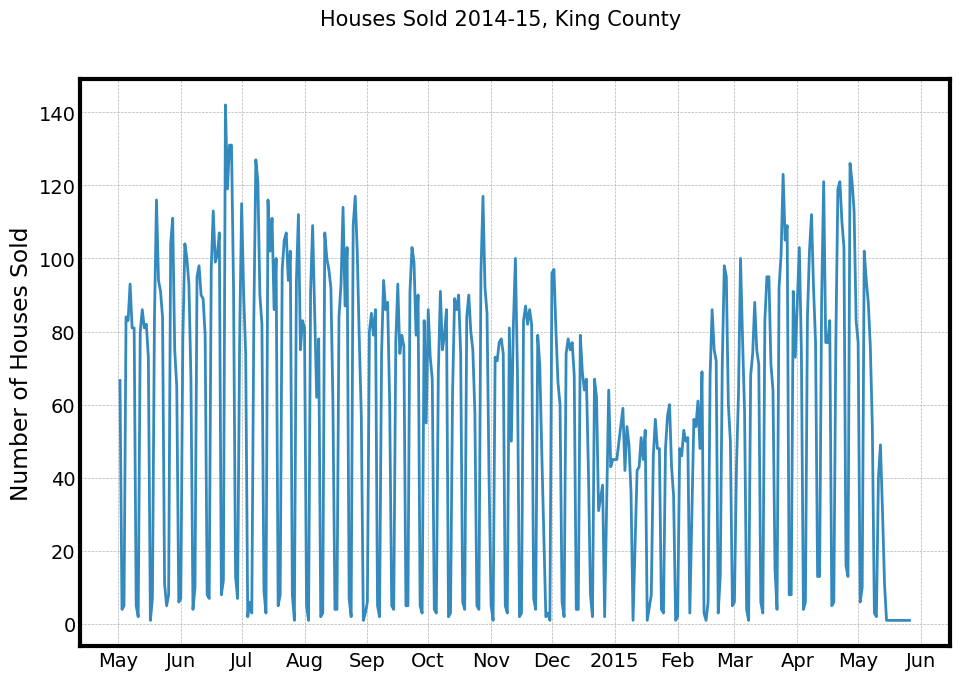

In [998]:
#https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
fig, ax = plt.subplots(figsize=(10, 7))#, #constrained_layout=True)

plt.suptitle(r'Houses Sold 2014-15, King County', fontsize=15)


ax.plot(dates_homes_sale, df_bydate['price'])

# Major ticks every month
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.grid(True)
ax.set_ylabel(r'Number of Houses Sold')

# Adding minor ticks for every 3 days within each month
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))  # Set minor ticks every 3 days

# Formatting the major ticks with a concise date formatter
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))

# Set minor tick labels to an empty string for better readability
ax.xaxis.set_minor_formatter(mdates.DateFormatter(''))

plt.show()

In [999]:
import plotly.graph_objects as go

In [1239]:
fig = go.Figure()
# Edit the layout
fig.update_layout(title='How Many Houses Sold in King County May 2014 - May 2015',
                   xaxis_title='Date',
                   yaxis_title='Number of Houses Sold')
fig.add_trace(go.Scatter(x=dates_homes_sale, y=df_bydate['price'],
                         line=dict(color='firebrick', width=1)))
fig.update_layout(xaxis=dict(showline=True, showgrid=True, showticklabels=True, linecolor='rgb(204, 204, 204)', linewidth=2,
    ticks='outside', tickfont=dict(family='Arial',size=12,color='rgb(82, 82, 82)',),),
    yaxis=dict(showgrid=True, zeroline=True, showline=True,showticklabels=True,))
fig.update_xaxes(dtick="M1",tick0="2014-01-15", tickformat="%b\n%Y")
fig.show()


### MY NOTES
-extra stuff you wanna do with this👆🏿

    - look more closely to see on what days the dips occur
    - make more ticks per month
    - panel with close up of just a couple of months
    - another chart with just expensive houses

In [1001]:
df_housing.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,2014-10-29 04:20:38.171968512,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284
min,1000102.000,2014-05-02 00:00:00,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,2014-07-22 00:00:00,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,2014-10-16 00:00:00,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,2015-02-17 00:00:00,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,2015-05-27 00:00:00,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000
std,2876735715.748,NaN,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.230,27274.442


In [1002]:
#create new column with price per sqft
#df.eval('weight_per_height = weight_whole / diameter', inplace = True)
df_housing.eval('price_per_sqft = price / sqft_living', inplace = True)
df_housing.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_per_sqft'],
      dtype='object')

In [1003]:
df_housing['price_per_sqft'].describe()

count   21597.000
mean      264.143
std       110.000
min        87.588
25%       182.292
50%       244.645
75%       318.333
max       810.139
Name: price_per_sqft, dtype: float64

In [1004]:
zip_prices = df_housing[['price_per_sqft', 'zipcode']]
zip_prices.sort_values(['price_per_sqft'])

,price_per_sqft,zipcode
18248,87.588,98002
3781,87.647,98146
13812,87.713,98059
17183,88.000,98038
1383,88.028,98056
...,...,...
9305,792.105,98004
8614,792.683,98146
10435,798.122,98112
4009,800.000,98075


In [1005]:
#Find $ in 'sqft_basement' column
df_housing.query('sqft_basement == "?"')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft
6,1321400060,2014-06-27,257500.000,3,2.250,1715,6819,2.000,0.000,0.000,...,1715,?,1995,0.000,98003,47.310,-122.327,2238,6819,150.146
18,16000397,2014-12-05,189000.000,2,1.000,1200,9850,1.000,0.000,0.000,...,1200,?,1921,0.000,98002,47.309,-122.210,1060,5095,157.500
42,7203220400,2014-07-07,861990.000,5,2.750,3595,5639,2.000,0.000,0.000,...,3595,?,2014,0.000,98053,47.685,-122.016,3625,5639,239.775
79,1531000030,2015-03-23,720000.000,4,2.500,3450,39683,2.000,0.000,0.000,...,3450,?,2002,0.000,98010,47.342,-122.025,3350,39750,208.696
112,2525310310,2014-09-16,272500.000,3,1.750,1540,12600,1.000,0.000,0.000,...,1160,?,1980,0.000,98038,47.362,-122.031,1540,11656,176.948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,2014-07-11,504600.000,5,3.000,2360,5000,1.000,0.000,0.000,...,1390,?,2008,0.000,98103,47.693,-122.330,2180,5009,213.814
21447,1760650900,2014-07-21,337500.000,4,2.500,2330,4907,2.000,0.000,0.000,...,2330,?,2013,NaN,98042,47.359,-122.081,2300,3836,144.850
21473,6021503707,2015-01-20,352500.000,2,2.500,980,1010,3.000,NaN,0.000,...,980,?,2008,0.000,98117,47.684,-122.387,980,1023,359.694
21519,2909310100,2014-10-15,332000.000,4,2.500,2380,5737,2.000,0.000,0.000,...,2380,?,2010,0.000,98023,47.282,-122.356,2380,5396,139.496


In [1006]:
# Replace ? marks in 'sqft_basement' column with NaN
df_housing['sqft_basement'] = df_housing.sqft_basement.replace('?',np.NaN)


In [1007]:
# correlation matrix between these variables
corr_columns=[ "zipcode","price", "price_per_sqft","yr_built", "yr_renovated","waterfront","view", "bathrooms", "sqft_living15", "sqft_basement"]
 #"sqft_living15", "sqft_lot15"]
corr_mtrx=df_housing[corr_columns].corr()
corr_mtrx

,zipcode,price,price_per_sqft,yr_built,yr_renovated,waterfront,view,bathrooms,sqft_living15,sqft_basement
zipcode,1.000,-0.053,0.173,-0.347,0.070,0.031,0.085,-0.205,-0.279,0.075
price,-0.053,1.000,0.556,0.054,0.130,0.276,0.396,0.526,0.585,0.325
price_per_sqft,0.173,0.556,1.000,-0.290,0.111,0.197,0.221,-0.090,0.039,-0.024
yr_built,-0.347,0.054,-0.290,1.000,-0.225,-0.026,-0.055,0.507,0.326,-0.133
yr_renovated,0.070,0.130,0.111,-0.225,1.000,0.087,0.101,0.051,-0.000,0.074
waterfront,0.031,0.276,0.197,-0.026,0.087,1.000,0.407,0.067,0.089,0.090
view,0.085,0.396,0.221,-0.055,0.101,0.407,1.000,0.186,0.280,0.277
bathrooms,-0.205,0.526,-0.090,0.507,0.051,0.067,0.186,1.000,0.570,0.283
sqft_living15,-0.279,0.585,0.039,0.326,-0.000,0.089,0.280,0.570,1.000,0.202
sqft_basement,0.075,0.325,-0.024,-0.133,0.074,0.090,0.277,0.283,0.202,1.000


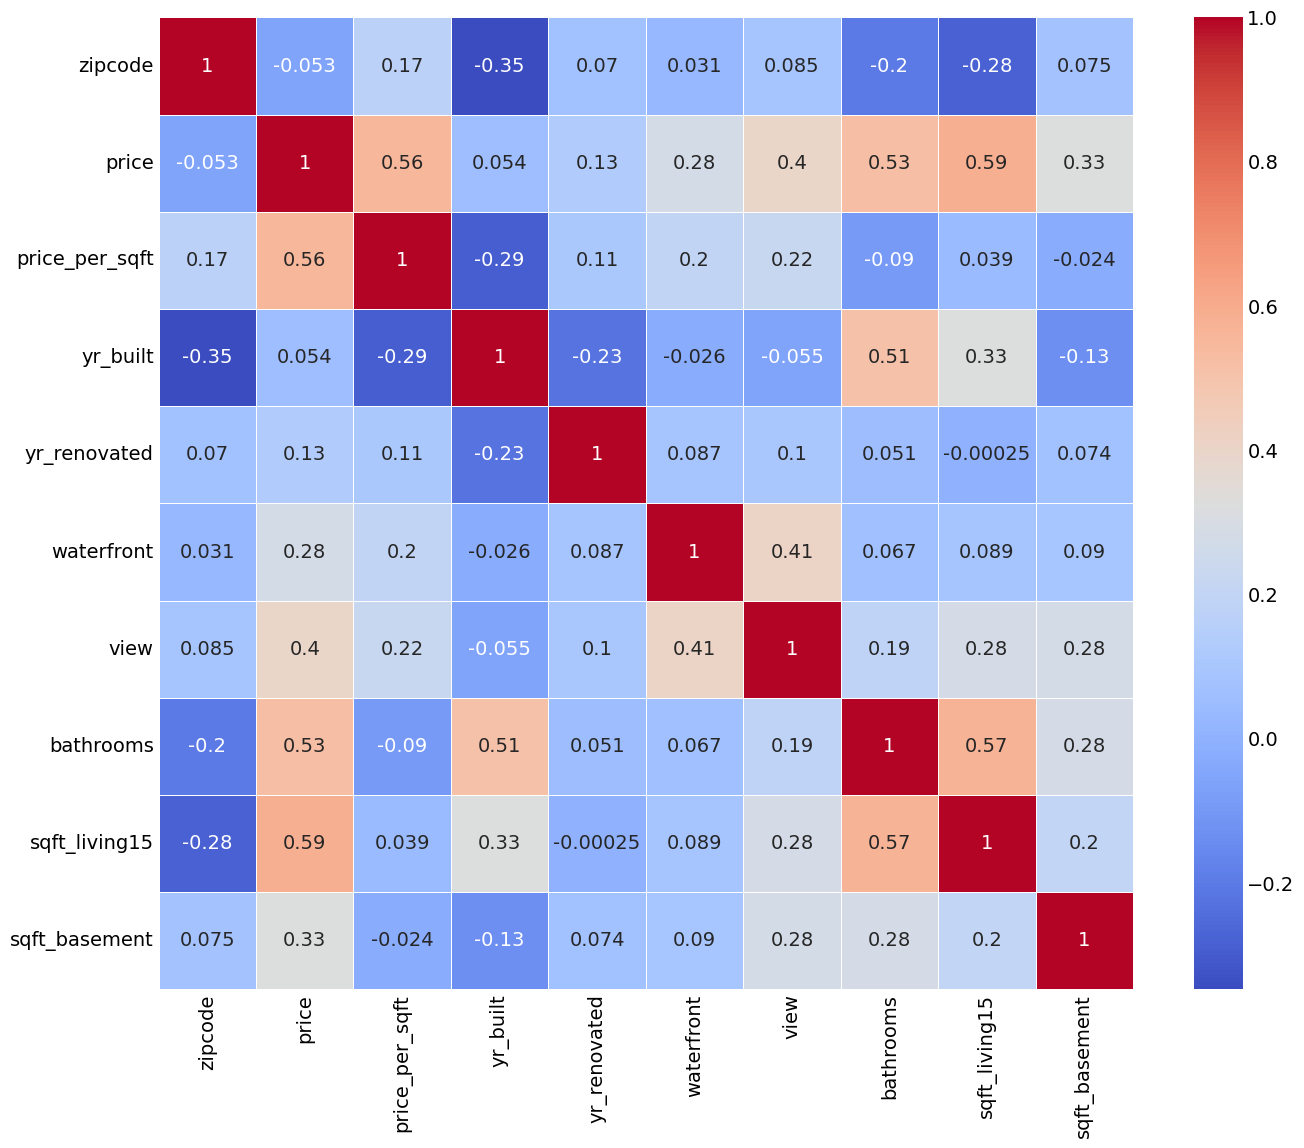

In [1008]:
# draw the heatmap 
plt.figure(figsize = (14,12))
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')

### MY NOTES:

##### Positive relationships
- Bathrooms & Price
- Bathrooms & Sqft Living 15
- View & Waterfront
- View & Price
- Waterfront & Price
- Sqft Basement & Price
- Sqft Living 15 & Price had highest correlation

#### Negative
- Zipcode & Sqft Living 15
- Yr_built & Zipcode
- Yr_built & Price per sqft
- Yr_built & Yr_renovated

Slightly negative correlation between year built and price
    - but is there a correlation between year built plus renovated and the price?
- So I need to look at just the zipcodes and just see where data shows the highest price per sqft and the biggest absolute prices are and the biggest sqft15

In [1010]:
#Dataframe with statistics of groupby zipcode 
#Plot zip code against total number of sales 'count' column, vs the median (avg sqft price sold) 
zip_sqftprice= new_zip.describe()
zip_sqftprice

price_per_sqft                                                        
                 count    mean     std     min     25%     50%     75%     max
zipcode                                                                       
98001          361.000 151.348  33.869  88.699 127.854 147.141 169.355 395.238
98002          199.000 151.174  32.255  87.588 125.950 147.177 170.297 247.475
98003          280.000 157.113  31.878  88.150 136.324 154.819 174.177 258.120
98004          317.000 475.610 123.935 241.573 386.975 456.944 558.824 792.105
98005          168.000 314.967  65.455 148.751 275.508 316.340 353.244 561.224
...                ...     ...     ...     ...     ...     ...     ...     ...
98177          255.000 292.982  93.497 139.535 230.743 272.075 334.936 735.294
98178          262.000 189.173  73.745  89.447 143.158 176.623 209.799 717.391
98188          136.000 169.007  41.127  88.542 138.427 163.897 195.989 287.838
98198          280.000 178.434  61.513  88.542 144.366 171.953 201.685 791.667
98199          317.000 376.660  98.244 211.268 308.081 354.305 425.633 750.000

[70 rows x 8 columns]

In [1063]:
# Used in Plot B

df_zipsnprice= df_housing.groupby('zipcode')['price'].sum()
df_zipsnprice

zipcode
98001   101511348.000
98002    46622523.000
98003    82351158.000
98004   430018105.000
98005   136128669.000
             ...     
98177   172486945.000
98178    81380542.000
98188    39314655.000
98198    84811087.000
98199   251123556.000
Name: price, Length: 70, dtype: float64

In [1069]:
dfzips_price2= df_zipsnprice.sort_values(ascending=False)
dfzips_price2

zipcode
98004   430018105.000
98006   428249400.000
98052   370370186.000
98115   361427439.000
98103   352199365.000
             ...     
98002    46622523.000
98010    42366599.000
98188    39314655.000
98032    31412030.000
98148    16239790.000
Name: price, Length: 70, dtype: float64

In [1071]:
dfzips_price2_reset= dfzips_price2.reset_index()


In [1073]:
dfzips_price2_sorted =dfzips_price2_reset['price'].sort_values(ascending=False)
dfzips_price2_sorted

0    430018105.000
1    428249400.000
2    370370186.000
3    361427439.000
4    352199365.000
          ...     
65    46622523.000
66    42366599.000
67    39314655.000
68    31412030.000
69    16239790.000
Name: price, Length: 70, dtype: float64

In [1076]:
#Revised for Plot B.1 uses this string for x and for y values use dfzips_price2.values
zipsnprice2_string= [str(code) for code in dfzips_price2.index]


In [1012]:
df_housing['zipcode'].value_counts

<bound method IndexOpsMixin.value_counts of 0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21592    98103
21593    98146
21594    98144
21595    98027
21596    98144
Name: zipcode, Length: 21597, dtype: int64>

In [ ]:
#make Zipcodes   sorted according to descending order of price into a string 
df_zipsnprice_string = [str(code) for code in top20yearly_sorted.index]

In [1013]:
#Plot b
top20yearly= df_zipsnprice.sort_values().tail(20)
top20yearly_sorted = top20yearly.sort_values(ascending=False)


In [1014]:
#Plot B.2
top20yearly_string= [str(code) for code in top20yearly_sorted.index]
top20yearly_string

['98004',
 '98006',
 '98052',
 '98115',
 '98103',
 '98033',
 '98040',
 '98117',
 '98074',
 '98112',
 '98034',
 '98075',
 '98053',
 '98027',
 '98199',
 '98059',
 '98038',
 '98118',
 '98116',
 '98144']

In [1015]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [1016]:
zipcodes = [98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010, 98011, 98014, 98019,
 98022, 98023, 98024, 98027, 98028, 98029, 98030, 98031, 98032, 98033, 98034, 98038,
 98039, 98040, 98042, 98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070,
 98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106,98107, 98108, 98109,
 98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125, 98126, 98133, 98136, 98144,
 98146, 98148, 98155, 98166, 98168, 98177, 98178, 98188, 98198, 98199]

In [1017]:
zipcodes_as_strings = [str(code) for code in zipcodes]

In [1018]:
df_housing['date']


0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [1019]:
# Create a custom function to label months and years uniquely
def custom_month_year(date):
    if date.month == 5 and date.year == 2014:
        return f"{date.strftime('%b')} {date.year} - May 2014"
    elif date.month == 5 and date.year == 2015:
        return f"{date.strftime('%b')} {date.year} - May 2015"
    else:
        return date.to_period('M')

# Apply the custom function to create a new column 'month_year'
df_housing['month_year'] = df_housing['date'].apply(custom_month_year)




In [1020]:
# Calculate the average amount sold per month
average_sold_per_month = df_housing.groupby(['zipcode','month_year'])['price'].mean()
average_sold_per_month.sort_values(ascending=False)

zipcode  month_year         
98039    2014-09               3560000.000
         2014-10               2535000.000
         May 2014 - May 2014   2448000.000
         2014-08               2401071.429
         2014-07               2136000.000
                                   ...    
98168    2014-06                220892.647
98148    2014-12                217500.000
98168    May 2014 - May 2014    211414.583
         May 2015 - May 2015    209500.000
98002    2015-01                192625.000
Name: price, Length: 904, dtype: float64

In [1044]:
#Dataframe groupby zipcode and price per sqft
new_zip= zip_prices.groupby('zipcode')
new_zip2= new_zip['price_per_sqft'].mean().round(2).sort_values(ascending=False)
#df2= pd.DataFrame(new_zip2)
#df2
new_zip3= new_zip2.reset_index()
new_zip3

,zipcode,price_per_sqft
0,98039,568.240
1,98004,475.610
2,98112,438.880
3,98109,433.560
4,98119,432.350
...,...,...
65,98030,155.160
66,98032,154.220
67,98001,151.350
68,98002,151.170


In [1050]:
#zipcodes_as_strings = [str(code) for code in zipcodes]
newzip3_string = [str(code) for code in new_zip3['zipcode']]

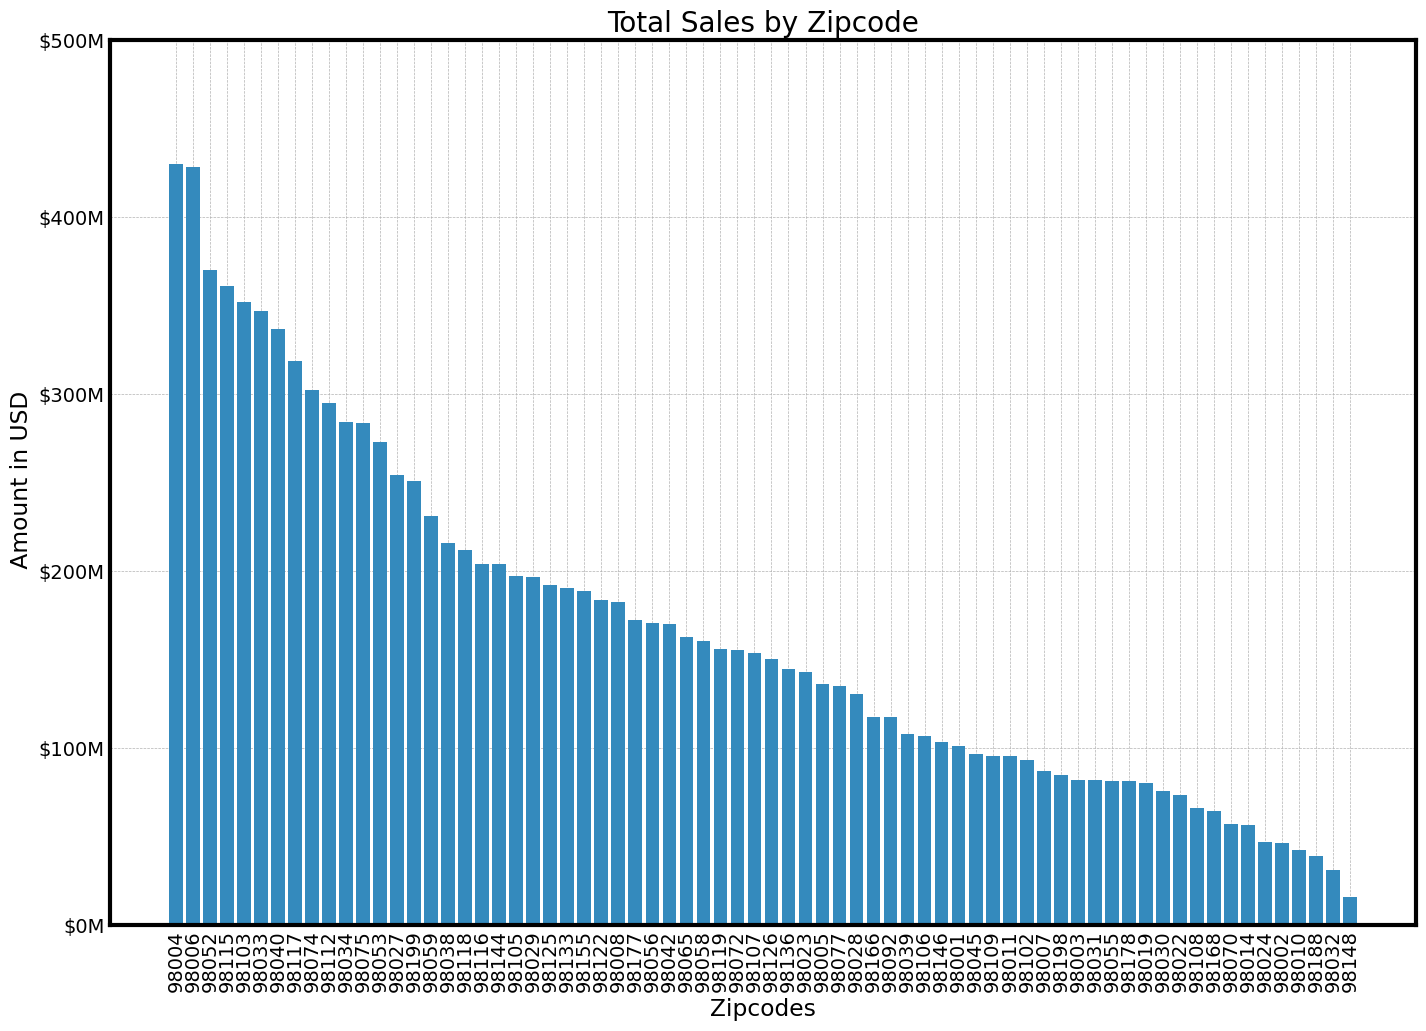

In [1266]:
#PlotB 1. total $ sales per zipcode/yr 2. total sales$ of of zip code per month 
#Plot 3. Median total sales of zip code/month 4. Avg price/sqft per zipcode
# Set subplots
fig, ax = plt.subplots(figsize= (14,10), layout='constrained')
fig.tight_layout(h_pad=10)

#define subplot titles
##unique_zipcodes_sorted #df_zipsnprice.index
ax.set_title('Total Sales by Zipcode')
#ax[0].bar(zipcodes_as_strings, df_zipsnprice.values) 
ax.bar(zipsnprice2_string, dfzips_price2.values)
ax.set_xlabel('Zipcodes')
ax.set_ylabel(' Amount in USD')
ax.set_ylim(0, 500_000_000)  # Set y-axis limits from 0 to 500 million
formatter = ticker.FuncFormatter(lambda x, pos: f"${x / 1_000_000:.0f}M")  # Format labels in millions
ax.yaxis.set_major_formatter(formatter)
# Set xticks for every zipcode
#ax[0].set_xticks(zipcodes_as_strings)
ax.set_xticklabels(zipsnprice2_string)
# Rotating x-axis labels for better readability (adjust as needed)
# Rotate every other label at a 30 to 45 degree angle for better readability
for label in ax.get_xaxis().get_ticklabels():
    #if int(label.get_text()) % 2 == 0:  # Adjust rotation for every other label
    label.set_rotation(90)  # Change the rotation angle as needed (e.g., 30 or 45 degrees)
#plt.xticks(rotation=90)
#ax[1].set_title('Top 20 in Yearly Sales')
#ax[1].bar(top20yearly_string, top20yearly_sorted.values)
#ax[1].set_ylabel('Amount in USD')
#ax[1].set_ylim(0, 500_000_000)  # Set y-axis limits from 0 to 500 million
####formatter = ticker.FuncFormatter(lambda x, pos: f"${x / 1_000_000:.0f}M")  # Format labels in millions
#ax[1].yaxis.set_major_formatter(formatter)
#ax[1].set_xticks(top20yearly_string)
#ax[1].set_xticklabels(top20yearly_string.index)
# Rotating x-axis labels for better readability (adjust as needed)
# Rotate every other label at a 30 to 45 degree angle for better readability
#for label in ax[0].get_xaxis().get_ticklabels():
    #if int(label.get_text()) % 2 == 0:  # Adjust rotation for every other label
    #label.set_rotation(45)  # Change the rotation angle as needed (e.g., 30 or 45 degrees)
    #if int(label.get_text()) % 2 == 0:  # Adjust rotation for every other label
#for label in ax[1].get_xaxis().get_ticklabels():
    #label.set_rotation(45)

##ax[2].set_title('Average Price per Square Foot in each ZipCode')
##ax[2].bar(newzip3_string, new_zip3['price_per_sqft'])
#ax[2].set_xticks(newzip3_string)
#ax[2].set_xlabel('Zipcodes')
#ax[2].set_ylabel('Sqft Price in USD')
#for label in ax[2].get_xaxis().get_ticklabels():
    #label.set_rotation(45)

# Show Max, Min, Average for the Whole Area
#ax[3].set_title('Overall Square Foot price per region')


#add overall title and adjust it so that it doesn't overlap with subplot titles
#fig.suptitle('HOME SALES in King County, Washington (May 2014 - May 2015)', fontsize=20)
plt.subplots_adjust(top=.93)

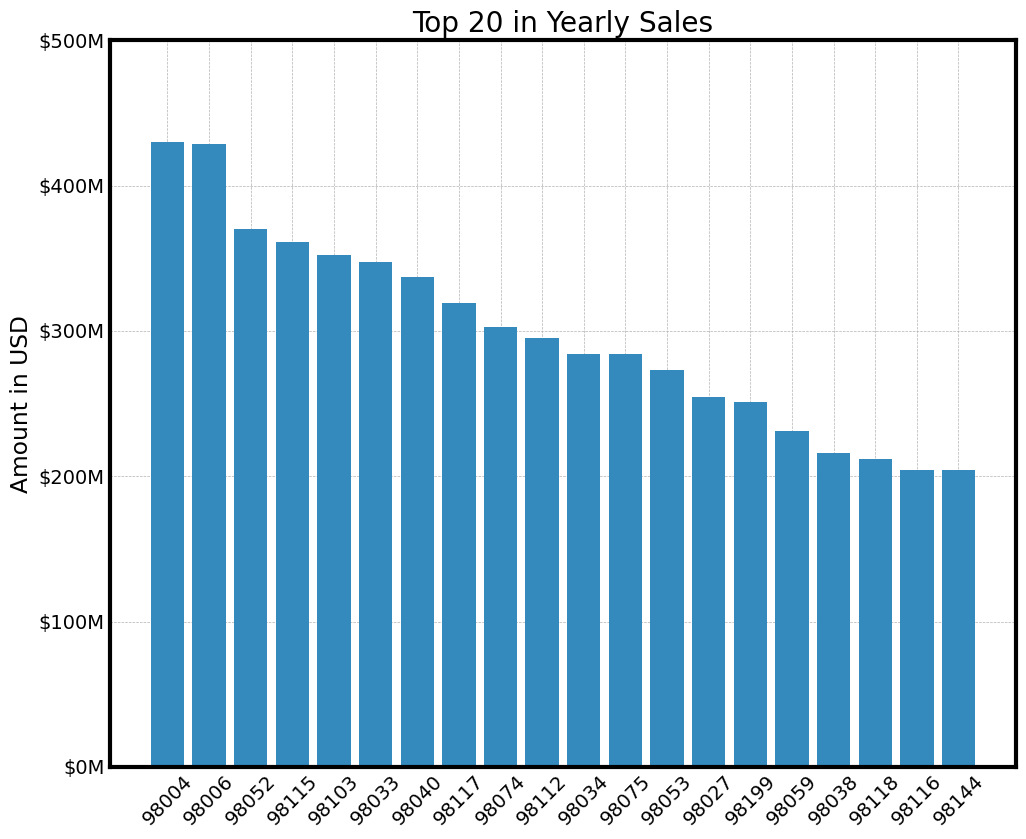

In [1252]:
fig, ax = plt.subplots( figsize= (10,8), layout='constrained')
fig.tight_layout(h_pad=10)


ax.set_title('Top 20 Zipcodes in Yearly Sales')
ax.bar(top20yearly_string, top20yearly_sorted.values)
ax.set_ylabel('Amount in USD')
ax.set_ylim(0, 500_000_000)  # Set y-axis limits from 0 to 500 million
formatter = ticker.FuncFormatter(lambda x, pos: f"${x / 1_000_000:.0f}M")  # Format labels in millions
ax.yaxis.set_major_formatter(formatter)
ax.set_xticks(top20yearly_string)
for label in ax.get_xaxis().get_ticklabels():
    label.set_rotation(45)

plt.subplots_adjust;

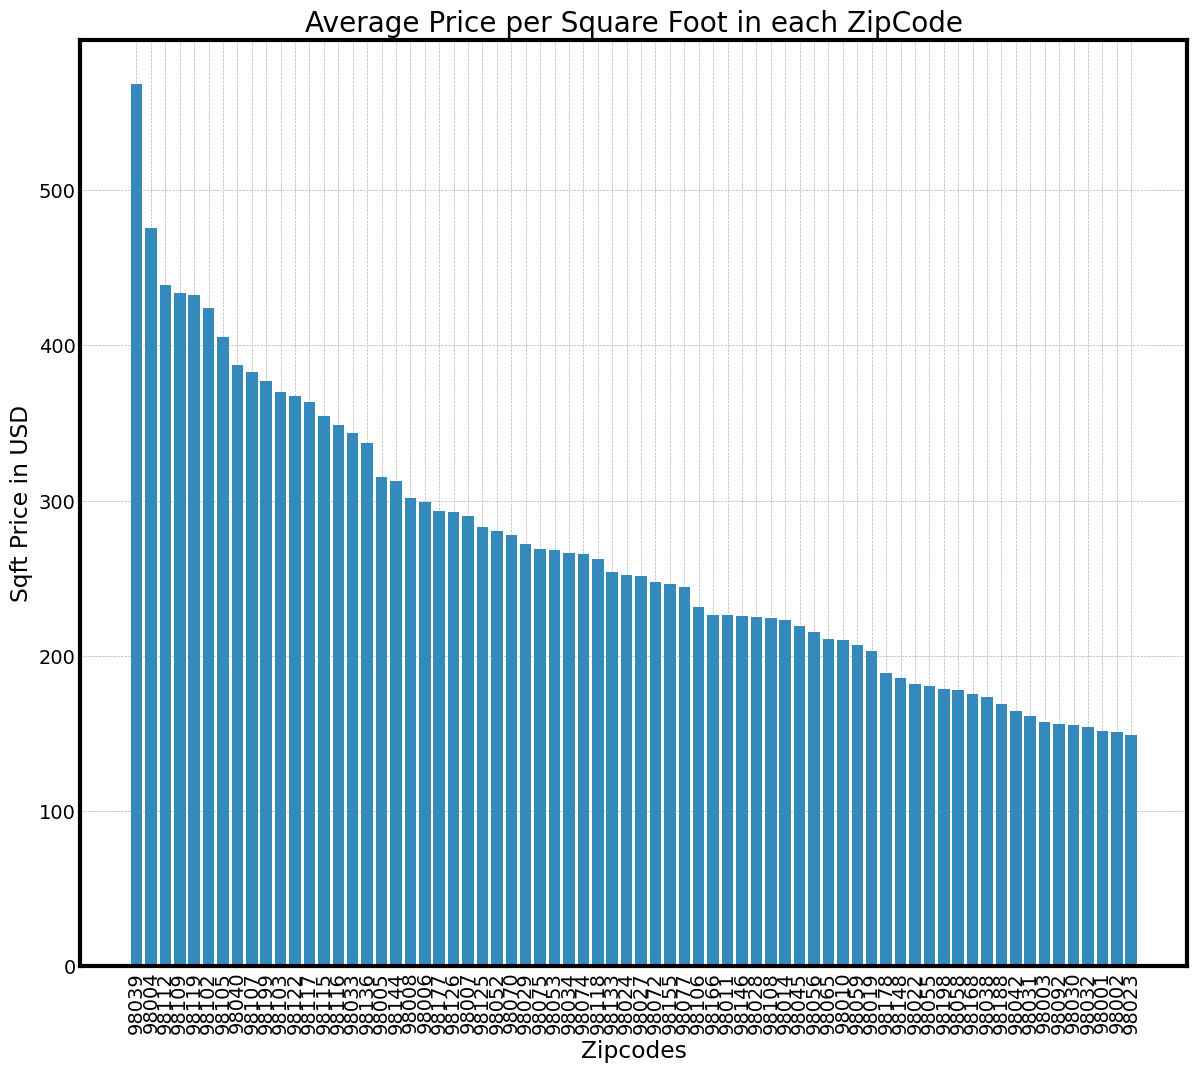

In [1260]:
fig, ax = plt.subplots( figsize= (12,10), layout='constrained')
fig.tight_layout(h_pad=10)

ax.set_title('Average Price per Square Foot in each ZipCode')
ax.bar(newzip3_string, new_zip3['price_per_sqft'])
ax.set_xticks(newzip3_string)
ax.set_xlabel('Zipcodes')
ax.set_ylabel('Sqft Price in USD')
for label in ax.get_xaxis().get_ticklabels():
    label.set_rotation(90)
plt.subplots_adjust;

`Note to self: the overlap between sqft price and the highest volume of sales would be good to know`

In [1087]:
#PLOT C
# Sort the values in descending order and get the top 20 rows
top_average_sold = average_sold_per_month.sort_values(ascending=False).iloc[0:19]

# Reset the index to access 'zipcode' and 'month_year' as columns
top_average_sold = top_average_sold.reset_index()

# Define a list of custom patterns or styles for bars
custom_patterns = ['dots', 'cross', 'diamond', 'circle-open', 'square']

# Create a Plotly grouped bar chart
fig = px.bar(top_average_sold, x='zipcode', y='price', color='month_year', color_discrete_sequence=px.colors.qualitative.Dark24,
             title='Top 20 Average Monthly Sales by Zipcode', barmode='group')

fig.update_xaxes(type='category')  # Ensure zip codes are treated as categories

# Show the plot
fig.show()

In [1023]:
#PlotC
top_average_sold['zipcode']

0     98039
1     98039
2     98039
3     98039
4     98039
5     98039
6     98004
7     98102
8     98004
9     98039
10    98004
11    98039
12    98006
13    98039
14    98004
15    98112
16    98039
17    98039
18    98040
Name: zipcode, dtype: int64

In [1024]:
# Filter rows in df_housing where 'zipcode' values are in top_average_sold['zipcode']
filtered_df = df_housing[df_housing['zipcode'].isin(top_average_sold['zipcode'])]

# Display the filtered DataFrame
filtered_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,month_year
21,2524049179,2014-08-26,2000000.000,3,2.750,3050,44867,1.000,0.000,4.000,...,720.0,1968,0.000,98040,47.532,-122.233,4110,20336,655.738,2014-08
27,3303700376,2014-12-01,667000.000,3,1.000,1400,1581,1.500,0.000,0.000,...,0.0,1909,0.000,98112,47.622,-122.314,1860,3861,476.429,2014-12
66,3394100030,2014-09-09,975000.000,4,2.500,2720,11049,2.000,NaN,0.000,...,0.0,1989,0.000,98004,47.581,-122.192,2750,11049,358.456,2014-09
69,1802000060,2014-06-12,1330000.000,5,2.250,3200,20158,1.000,0.000,0.000,...,1600.0,1965,0.000,98004,47.630,-122.215,3390,20158,415.625,2014-06
95,1483300570,2014-09-08,905000.000,4,2.500,3300,10250,1.000,0.000,0.000,...,910.0,1946,1991.000,98040,47.587,-122.249,1950,6045,274.242,2014-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21536,688000017,2014-06-27,516500.000,1,1.250,1100,638,3.000,NaN,0.000,...,0.0,2014,0.000,98112,47.623,-122.307,1110,1933,469.545,2014-06
21552,524059330,2015-01-30,1700000.000,4,3.500,3830,8963,2.000,0.000,0.000,...,710.0,2014,0.000,98004,47.599,-122.197,2190,10777,443.864,2015-01
21567,2025049203,2014-06-10,399950.000,2,1.000,710,1157,2.000,NaN,0.000,...,0.0,1943,0.000,98102,47.641,-122.329,1370,1173,563.310,2014-06
21581,191100405,2015-04-21,1580000.000,4,3.250,3410,10125,2.000,0.000,0.000,...,NaN,2007,NaN,98040,47.565,-122.223,2290,10125,463.343,2015-04


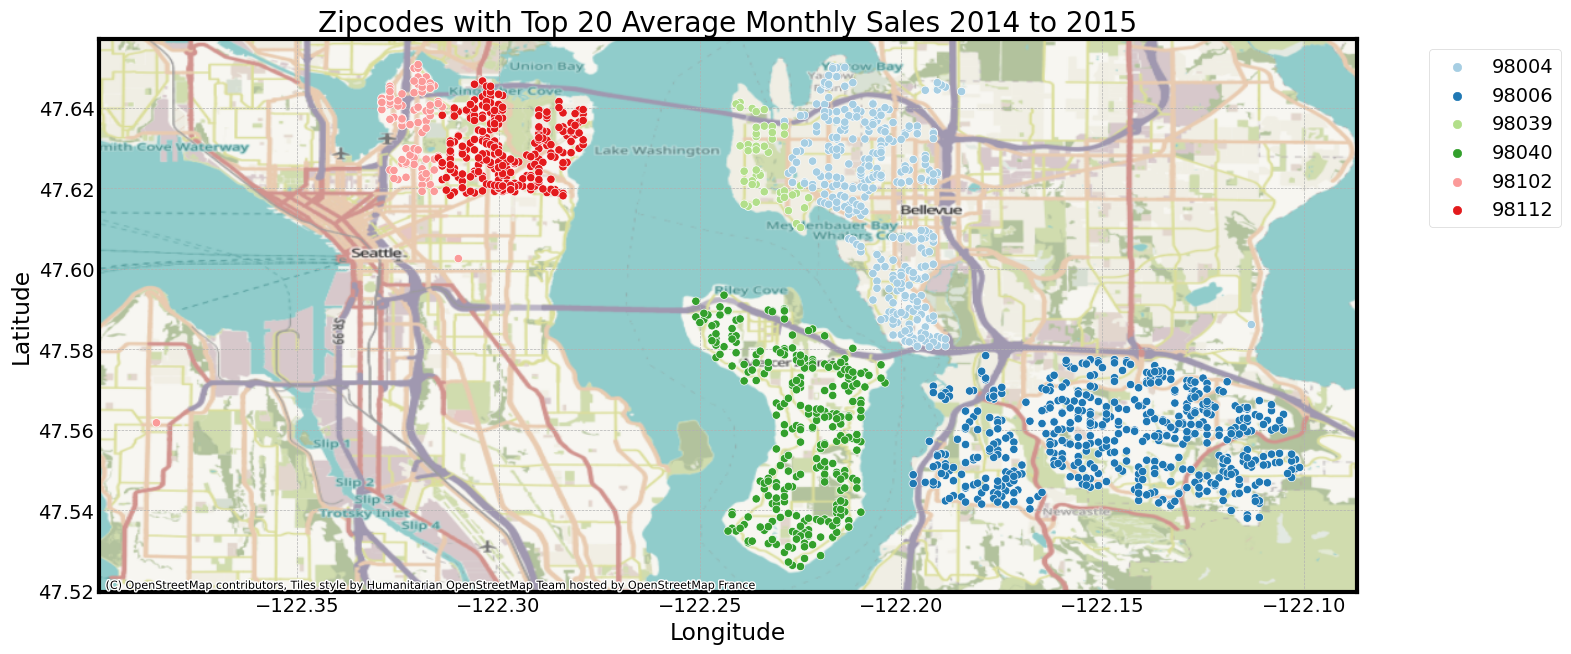

In [1268]:
#PlOT D

import matplotlib.pyplot as plt
import seaborn as sns
import contextily as ctx


fig, ax = plt.subplots(figsize=(16, 25))

# Create a scatterplot
maps_fig = sns.scatterplot(data=filtered_df, x='long', y='lat', hue='zipcode', palette='Paired', legend=True, ax=ax)

# Set the title and labels
maps_fig.set_title('Zipcodes with Top 20 Average Monthly Sales 2014 to 2015')
maps_fig.set_xlabel('Longitude')
maps_fig.set_ylabel('Latitude')

# Add map background from OpenStreetMap using contextily
ctx.add_basemap(ax, crs='EPSG:4326')  # Add OpenStreetMap tiles in Web Mercator projection

# Show the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust the legend position
plt.tight_layout()
plt.show()


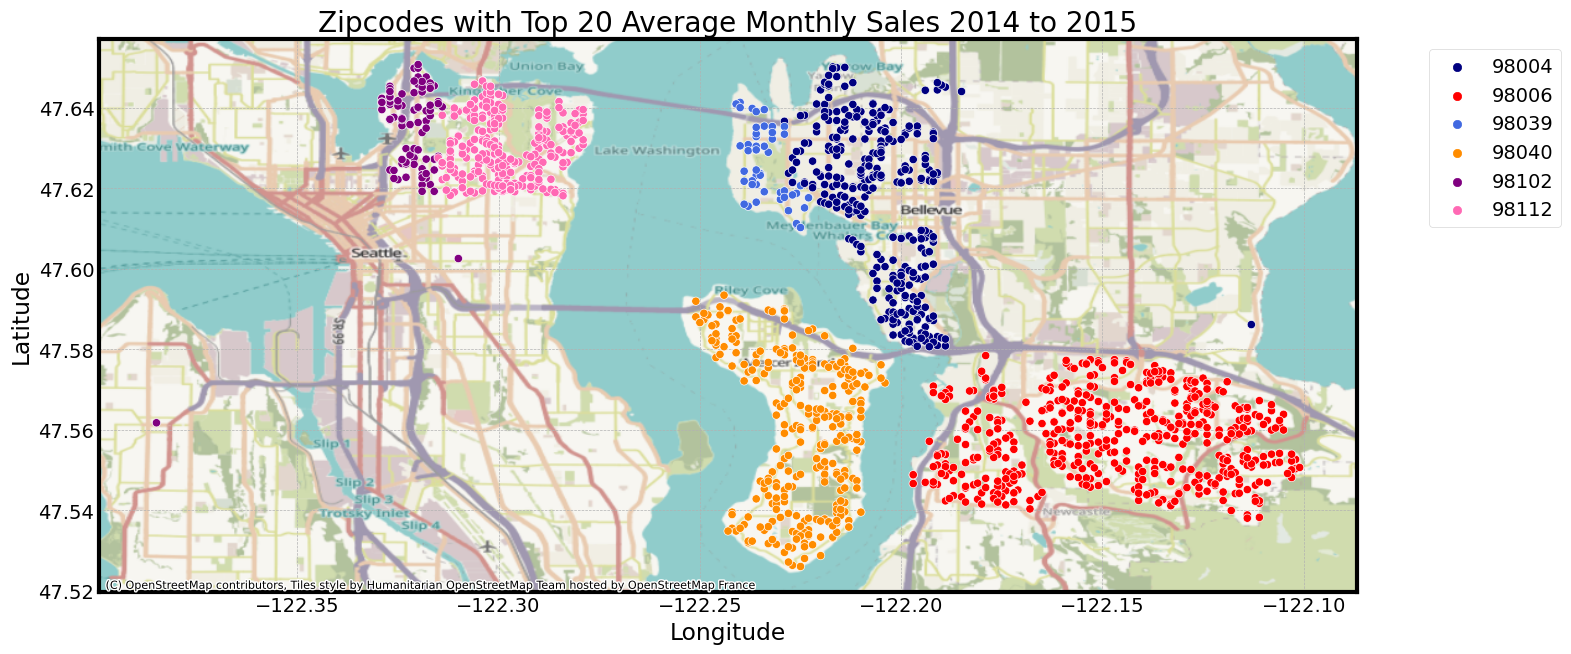

In [1270]:
# PLOT D REVISED
#Define the new colors you want to use
new_colors = ['navy', 'red', 'royalblue', 'darkorange', 'purple', 'hotpink']
# Dictionary mapping zip codes to names for the legend
zipcode_names = {98004: 'Bellevue', 98006: 'Bellevue', 98039: 'Medina', 98040: 'Mercer Island', 
                 98102: 'Eastlake|Cascade(Seattle)', 98112:'Capitol Hill/Montlake'}
                 

# Assuming you have already defined filtered_df

fig, ax = plt.subplots(figsize=(16, 25))
# Create a scatterplot with the specified color palette
maps_fig = sns.scatterplot(data=filtered_df, x='long', y='lat', hue='zipcode', palette=new_colors, legend=True, ax=ax)


maps_fig.legend(labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='upper right')

# Set the title and labels
maps_fig.set_title('Zipcodes with Top 20 Average Monthly Sales 2014 to 2015')
maps_fig.set_xlabel('Longitude')
maps_fig.set_ylabel('Latitude')
# Rename legend labels using the zipcode_names dictionary
legend_labels = [zipcode_names[code] if code in zipcode_names else code for code in filtered_df['zipcode'].unique()]

# Add map background from OpenStreetMap using contextily
ctx.add_basemap(ax, crs='EPSG:4326')  # Add OpenStreetMap tiles in Web Mercator projection

# Show the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust the legend position
plt.tight_layout()
plt.show()

In [1027]:
#Dataframe with just zipcode and price, grouped by zipcode
#Plot B zip code against total number of sales 'count' column, vs the median (avg price sold) 
propertyprice_byzip = df_housing[['zipcode', 'price']]
propertyprice_byzip = propertyprice_byzip.groupby('zipcode')
propertyprice_byzip.describe()

price                                                           \
          count        mean        std        min        25%         50%   
zipcode                                                                    
98001   361.000  281194.870  98837.431 100000.000 215000.000  260000.000   
98002   199.000  234284.035  52041.449  95000.000 199975.000  235000.000   
98003   280.000  294111.279 107597.662 128000.000 229000.000  267475.000   
98004   317.000 1356523.991 746094.067 425000.000 845000.000 1150000.000   
98005   168.000  810289.696 268979.168 400000.000 637775.000  765475.000   
...         ...         ...        ...        ...        ...         ...   
98177   255.000  676419.392 436379.740 245560.000 428500.000  554000.000   
98178   262.000  310612.756 161044.746  90000.000 223250.000  278277.000   
98188   136.000  289078.346 103106.580 110000.000 228750.000  264000.000   
98198   280.000  302896.739 154906.277  95000.000 216375.000  265000.000   
98199   317.000  792187.874 398428.722 323000.000 535000.000  689800.000   

                                 
                75%         max  
zipcode                          
98001    320000.000  850000.000  
98002    268500.000  389000.000  
98003    330000.000  950000.000  
98004   1690000.000 7060000.000  
98005    911250.000 1960000.000  
...             ...         ...  
98177    739475.000 3800000.000  
98178    349792.500 1700000.000  
98188    335000.000  707000.000  
98198    340000.000 1350000.000  
98199    950000.000 3200000.000  

[70 rows x 8 columns]

In [1028]:
df_price= propertyprice_byzip.describe()
df_price = pd.DataFrame(df_price)
df_price

price                                                           \
          count        mean        std        min        25%         50%   
zipcode                                                                    
98001   361.000  281194.870  98837.431 100000.000 215000.000  260000.000   
98002   199.000  234284.035  52041.449  95000.000 199975.000  235000.000   
98003   280.000  294111.279 107597.662 128000.000 229000.000  267475.000   
98004   317.000 1356523.991 746094.067 425000.000 845000.000 1150000.000   
98005   168.000  810289.696 268979.168 400000.000 637775.000  765475.000   
...         ...         ...        ...        ...        ...         ...   
98177   255.000  676419.392 436379.740 245560.000 428500.000  554000.000   
98178   262.000  310612.756 161044.746  90000.000 223250.000  278277.000   
98188   136.000  289078.346 103106.580 110000.000 228750.000  264000.000   
98198   280.000  302896.739 154906.277  95000.000 216375.000  265000.000   
98199   317.000  792187.874 398428.722 323000.000 535000.000  689800.000   

                                 
                75%         max  
zipcode                          
98001    320000.000  850000.000  
98002    268500.000  389000.000  
98003    330000.000  950000.000  
98004   1690000.000 7060000.000  
98005    911250.000 1960000.000  
...             ...         ...  
98177    739475.000 3800000.000  
98178    349792.500 1700000.000  
98188    335000.000  707000.000  
98198    340000.000 1350000.000  
98199    950000.000 3200000.000  

[70 rows x 8 columns]

In [1029]:
unique_zipcodes_sorted = pd.unique(df_housing['zipcode'])
unique_zipcodes_sorted.sort()
print(unique_zipcodes_sorted)


[98001 98002 98003 98004 98005 98006 98007 98008 98010 98011 98014 98019
 98022 98023 98024 98027 98028 98029 98030 98031 98032 98033 98034 98038
 98039 98040 98042 98045 98052 98053 98055 98056 98058 98059 98065 98070
 98072 98074 98075 98077 98092 98102 98103 98105 98106 98107 98108 98109
 98112 98115 98116 98117 98118 98119 98122 98125 98126 98133 98136 98144
 98146 98148 98155 98166 98168 98177 98178 98188 98198 98199]


In [1030]:
#How much was sold per year in each zip code
#Dataframe grouped by zipcode and price selected
#Plot B.1 this
df_homeprice=propertyprice_byzip['price'].sum()
df_homeprice= pd.DataFrame(df_homeprice)
homeprice= df_homeprice.astype('int64')
homeprice['price']

zipcode
98001    101511348
98002     46622523
98003     82351158
98004    430018105
98005    136128669
           ...    
98177    172486945
98178     81380542
98188     39314655
98198     84811087
98199    251123556
Name: price, Length: 70, dtype: int64

#### Hypotheses 1.0
1. Neighborhood with the highest density of old houses have the highest price per sqft.
2. Large houses within an hour of the city probably also expensive with large lot.
3. Best time to sell probably  before July(early summer/late spring) with the least amount of rain.✅

In [1089]:
#Find Rows with the oldest Homes
df_housing.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_per_sqft',
       'month_year'],
      dtype='object')

In [1090]:
df_housing['yr_built'].sort_values()

14069    1900
14783    1900
10973    1900
115      1900
4693     1900
         ... 
20235    2015
7519     2015
14911    2015
4150     2015
19789    2015
Name: yr_built, Length: 21597, dtype: int64

In [ ]:
df_housing.query('yr_built==2015')

In [1091]:
# How does the market look overall in terms of when houses were built?
df_housing['yr_built'].describe()

count   21597.000
mean     1971.000
std        29.375
min      1900.000
25%      1951.000
50%      1975.000
75%      1997.000
max      2015.000
Name: yr_built, dtype: float64

In [1104]:
#Average price for the year built irregardless of  other factors
df_housing_ybpricesorted= df_housing.groupby('yr_built').price.mean().sort_values(ascending=False).head(20)
df_housing_ybpricesorted

yr_built
1933   772483.333
2015   759970.947
1905   753443.932
2001   741340.043
1909   696448.989
2014   683792.685
2000   682003.619
2013   678599.582
1907   676324.477
1902   673192.593
1910   671671.836
1906   670027.663
1931   661781.148
1927   654154.209
1937   648791.544
1999   642989.589
1936   642335.000
2008   642037.717
1996   641759.474
1911   632584.247
Name: price, dtype: float64

In [1109]:
ybpricesorted_string = [str(year) for year in df_housing_ybpricesorted.index]

In [1112]:
#Top 20 most expensive homes  in overall price 
# Create a bar plot using Plotly
fig = px.bar(x=ybpricesorted_string, y=df_housing_ybpricesorted.values ,
             title='20 Most Expensive Properties by Year Built',
             labels={'x': 'Year Built', 'y': 'Sale Price'})

# Show the plot
fig.show()

In [1097]:
#How many were sold from each year built? How available is each yr_built (exclusivity)?
df_housing['yr_built'].value_counts().sort_values()

yr_built
1934     21
1935     24
1902     27
1901     29
1933     30
       ... 
2003    420
2004    433
2005    450
2006    453
2014    559
Name: count, Length: 116, dtype: int64

In [ ]:
# How many were sold per each decade built, bin every 10 years, so 12 bins. Add new column Plotly bar

# Create bins for 10-year increments starting from 1900 to 2015
bins = list(range(1900, 2021, 10))  # Increase the end range by 1 to include 2015

# Assign labels to the bins to represent the decade
labels = [f"{year}-{year + 9}" for year in range(1900, 2016, 10)]

df_housing['decade_built'] = pd.cut(df_housing['yr_built'], bins=bins, labels=labels)
df_housing


In [1120]:
xperidf= df_housing.groupby('decade_built').size()
xperidf

CategoricalIndex(['1900-1909', '1910-1919', '1920-1929', '1930-1939',
                  '1940-1949', '1950-1959', '1960-1969', '1970-1979',
                  '1980-1989', '1990-1999', '2000-2009', '2010-2019'],
                 categories=['1900-1909', '1910-1919', '1920-1929', '1930-1939', ..., '1980-1989', '1990-1999', '2000-2009', '2010-2019'], ordered=True, dtype='category', name='decade_built')

In [1111]:
#How many sold from a ten year span, bin every 10 years
# Group by 'decade_built' and count occurrences
#.size(): Counts the number of occurrences within each group.
#.reset_index(name='count'): Resets the index of the resulting Series to create a DataFrame 
#and names the count column as 'count'.
grouped_data = df_housing.groupby('decade_built').size().reset_index(name='count')

# bar plot using Plotly
fig = px.bar(grouped_data, x='decade_built', y='count',
             title='Number of Houses Sold by Decade Built',
             labels={'decade_built': 'Decade Built', 'count': 'Number of Houses'})

# Show the plot
fig.show()

In [1165]:
grouped_data

,decade_built,count
0,1900-1909,692
1,1910-1919,769
2,1920-1929,1184
3,1930-1939,596
4,1940-1949,1856
5,1950-1959,2449
6,1960-1969,2542
7,1970-1979,2393
8,1980-1989,2358
9,1990-1999,2133


In [1168]:
grouped_data['percent_of_total'] =((grouped_data['count'])/ (grouped_data['count'].sum())*100).round(2)
grouped_data

,decade_built,count,percent_of_total
0,1900-1909,692,3.220
1,1910-1919,769,3.580
2,1920-1929,1184,5.500
3,1930-1939,596,2.770
4,1940-1949,1856,8.630
5,1950-1959,2449,11.390
6,1960-1969,2542,11.820
7,1970-1979,2393,11.130
8,1980-1989,2358,10.960
9,1990-1999,2133,9.920


In [1173]:
fig = px.bar(grouped_data, x='decade_built', y='percent_of_total',
             title='Number of Houses Sold in Percents by Decade Built',
             labels={'decade_built': 'Decade Built', 'percent_of_total': 'Percent of Houses Sold (%)'},
             color_discrete_sequence=['darkred'])  # Set the bar color to red

# Show the plot
fig.show()

In [1149]:
#Overall Volume Sold in $ Per Year by Decade
#grouped_data = df_housing.groupby('decade_built').size().reset_index(name='count')
overall_sales = df_housing.groupby('decade_built').price.sum()
overall_sales_sorted =overall_sales.sort_values(ascending=False).reset_index(name='yearly_sales_total')
overall_sales_sorted

,decade_built,yearly_sales_total
0,2000-2009,2085836091.000
1,1990-1999,1272781723.000
2,1980-1989,1262820435.000
3,1970-1979,1190261135.000
4,1950-1959,1169030614.000
5,1960-1969,1159304163.000
6,1940-1949,818964069.000
7,1920-1929,717908076.000
8,2010-2019,707986100.000
9,1900-1909,448106173.000


In [1153]:

overall_sales = overall_sales.reset_index(name='yearly_sales_total')


TypeError: DataFrame.reset_index() got an unexpected keyword argument 'name'

In [1154]:
overall_sales

,decade_built,yearly_sales_total
0,1900-1909,448106173.000
1,1910-1919,430018225.000
2,1920-1929,717908076.000
3,1930-1939,355174607.000
4,1940-1949,818964069.000
5,1950-1959,1169030614.000
6,1960-1969,1159304163.000
7,1970-1979,1190261135.000
8,1980-1989,1262820435.000
9,1990-1999,1272781723.000


In [1163]:
#add percent column to overall sales
overall_sales['percent_yearly_total']= ((overall_sales['yearly_sales_total'])/(overall_sales['yearly_sales_total'].sum())*100).round(2)

In [1164]:
overall_sales

,decade_built,yearly_sales_total,percent_yearly_total
0,1900-1909,448106173.000,3.860
1,1910-1919,430018225.000,3.700
2,1920-1929,717908076.000,6.180
3,1930-1939,355174607.000,3.060
4,1940-1949,818964069.000,7.050
5,1950-1959,1169030614.000,10.060
6,1960-1969,1159304163.000,9.980
7,1970-1979,1190261135.000,10.240
8,1980-1989,1262820435.000,10.870
9,1990-1999,1272781723.000,10.960


In [1174]:
fig = px.bar(overall_sales, x='decade_built', y='percent_yearly_total',
             title='Percent of Total Sales by Decade Built',
             labels={'decade_built': 'Decade Built', 'percent_of_total': 'Percent of Total Sales (%)'},
             color_discrete_sequence=['darkred'])  # Set the bar color to red

# Show the plot
fig.show()

In [1155]:
#PLOT OF OVERALL SALES PER DECADE
# bar plot using Plotly
fig = px.bar(overall_sales, x='decade_built', y='yearly_sales_total',
             title='Totals Sales in USD by Decade Built',
             labels={'decade_built': 'Decade Built', 'count': 'Amount in US$'})

# Show the plot
fig.show()

In [1121]:
df_housing.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_per_sqft',
       'month_year', 'decade_built'],
      dtype='object')

In [1124]:
# and then in sqft price when were they built and where are they?
decadesqft_pricegroup= df_housing.groupby('decade_built') ['price_per_sqft']
decadesqft_pricegroup

In [1129]:
#Avg sqft price in descending order by decade
decadesqft_pricegroup.mean().sort_values(ascending=False)

decade_built
1900-1909   360.894
1920-1929   348.753
1910-1919   333.346
1930-1939   321.203
1940-1949   302.368
1950-1959   269.912
2010-2019   253.871
2000-2009   252.276
1980-1989   235.052
1960-1969   234.342
1990-1999   231.783
1970-1979   230.110
Name: price_per_sqft, dtype: float64

In [1131]:
# Plot Avg price per sqft data by decade in descending order
decadessqft_pricegroup2= decadesqft_pricegroup.mean().sort_values(ascending=False).reset_index(name='avg_sqft_price')
decadessqft_pricegroup2

,decade_built,avg_sqft_price
0,1900-1909,360.894
1,1920-1929,348.753
2,1910-1919,333.346
3,1930-1939,321.203
4,1940-1949,302.368
5,1950-1959,269.912
6,2010-2019,253.871
7,2000-2009,252.276
8,1980-1989,235.052
9,1960-1969,234.342


In [1136]:

# PLOT OF AVG SQft price by Decade
fig = px.bar(decadessqft_pricegroup2, y='decade_built', x='avg_sqft_price',
             orientation='h',  # Set orientation to horizontal
             title='Average Sqft Price by Decade',
             labels={'decade_built': 'Decade Built', 'avg_sqft_price': 'Price in US$'})

#Update layout for better presentation
fig.update_layout(xaxis_title='Sqft Price in US$', yaxis_title='Decade Built',
                  yaxis={'categoryorder': 'total ascending'})  # Sort by total counts ascending

# Show the plot
fig.show()

In [1175]:
zipcodes = [98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010, 98011, 98014, 98019,
 98022, 98023, 98024, 98027, 98028, 98029, 98030, 98031, 98032, 98033, 98034, 98038,
 98039, 98040, 98042, 98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070,
 98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106,98107, 98108, 98109,
 98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125, 98126, 98133, 98136, 98144,
 98146, 98148, 98155, 98166, 98168, 98177, 98178, 98188, 98198, 98199]

In [1179]:
# Map of all the zipcodes
from geopy.geocoders import Nominatim


zipcodes = [98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010, 98011, 98014, 98019,
 98022, 98023, 98024, 98027, 98028, 98029, 98030, 98031, 98032, 98033, 98034, 98038,
 98039, 98040, 98042, 98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070,
 98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106,98107, 98108, 98109,
 98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125, 98126, 98133, 98136, 98144,
 98146, 98148, 98155, 98166, 98168, 98177, 98178, 98188, 98198, 98199]

geolocator = Nominatim(user_agent="geoapiExercises")
coordinates = {}
for zipcode in zipcodes:
    location = geolocator.geocode(f"{zipcode}, King County, Washington, USA")
    if location:
        coordinates[zipcode] = {'latitude': location.latitude, 'longitude': location.longitude}
    else:
        coordinates[zipcode] = {'latitude': None, 'longitude': None}

print(coordinates)

GeocoderInsufficientPrivileges: Non-successful status code 403

### Find best neighborhoods : Area with most amount of houses with highest price per sqft.

#### Price per square foot...
1.  of the individual home zip code with highest price/sqft living space
    - incl. lot space 
    - square feet above
2. of neighboring homes zipcode with greatest price/sqft_living 15 
    - sq lot space15

#### Correlation between price & no of bedrooms/bathrooms
#### Correlation between Zip Code & price
#### Correlation between condition & price if other factors are eliminated

#### Proximity to Waterfront Zipcode
1. is flooding an issue (are basements/homes renovated often)
2. basement size & waterfront
3. Correlation price to waterfront

#### Historical Home density
1. what is considered a historical home in terms of the market prices `50+ years plus historical significance`
2. can historical be determined arbitrarily
3. which zip code has the oldest homes

#### Rating Systems what is high/low? Discrete values?
1. View 0-4
2. Condition 1 -5
3. Waterfront 0-1
4. Grade 3- 13
    - display unique values
    - Do Views affect Price?  What does view metric mean? What kind of data is it?

### Best time to buy/sell- 
- How do house prices fair over the year with like features (price per sqft, view, waterfront, condition?)

### Should we renovate
- How do renovations affect housing price: historical vs modern home?
  
    

